Convolutional Neural Network 

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Lets import the CIFAR10 dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()  

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
# convert 2d array to 1d array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

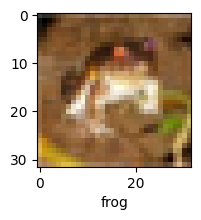

In [9]:
plot_sample(X_train,y_train,0)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

Build an simple neural network with 2 hidden layers and one output layer

In [11]:
ann = keras.Sequential([    
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 158s 100ms/step - loss: 1.8135 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.6257 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.5432 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4850 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.4352 - accuracy: 0.4957


In [12]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.4946 - accuracy: 0.4621


[1.4945553541183472, 0.46209999918937683]

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

print("Classifiaction Reoprt: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classifiaction Reoprt: 
               precision    recall  f1-score   support

           0       0.38      0.75      0.50      1000
           1       0.73      0.40      0.52      1000
           2       0.33      0.47      0.39      1000
           3       0.39      0.25      0.30      1000
           4       0.48      0.28      0.36      1000
           5       0.43      0.32      0.37      1000
           6       0.59      0.39      0.47      1000
           7       0.47      0.63      0.54      1000
           8       0.56      0.55      0.55      1000
           9       0.52      0.58      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



Creating an CNN Model

In [14]:
cnn = keras.Sequential([
        # CNN
        keras.layers.Conv2D(filters=32,kernel_size = (3,3),activation='relu',input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=64,kernel_size = (3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        # Dense 
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])

In [15]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [16]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 42ms/step - loss: 1.3667 - accuracy: 0.5117
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0141 - accuracy: 0.6447
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8587 - accuracy: 0.7012
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7408 - accuracy: 0.7423
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6292 - accuracy: 0.7820
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5285 - accuracy: 0.8157
Epoch 7/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.4281 - accuracy: 0.8492
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.3459 - accuracy: 0.8781
Epoch 9/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.2703 - accuracy: 0.9047
Epoch 10/10
1563/1563 [==============================] - 65s 41m

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.3079 - accuracy: 0.6888


[1.3079434633255005, 0.6887999773025513]

In [18]:
y_test = y_test.reshape(-1,)

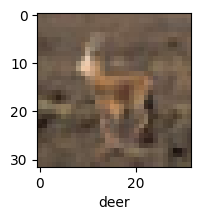

In [31]:
plot_sample(X_test,y_test,1)

In [20]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [21]:
y_pred[:5]

array([[6.48454588e-08, 1.04054529e-02, 1.50124924e-06, 6.19911253e-01,
        9.77800482e-07, 3.69249374e-01, 7.46367679e-09, 4.57178867e-05,
        3.04084766e-04, 8.15359308e-05],
       [3.04609249e-09, 7.92505580e-06, 1.32239048e-15, 2.63477772e-15,
        3.69214037e-20, 4.46943093e-21, 5.48093886e-18, 6.35237611e-18,
        9.99991655e-01, 3.90966022e-07],
       [3.03442627e-02, 2.71150678e-01, 9.12392497e-05, 6.52797613e-03,
        1.30639601e-04, 2.49134435e-04, 3.27665498e-06, 4.95579967e-04,
        6.87535346e-01, 3.47182760e-03],
       [9.32837784e-01, 6.53895142e-04, 4.37936094e-03, 8.17322580e-04,
        3.99775627e-06, 5.24176720e-08, 1.97441125e-07, 1.84716134e-06,
        6.04045615e-02, 9.01014020e-04],
       [4.21720655e-13, 3.70766706e-08, 5.19861969e-05, 8.23347941e-02,
        9.06781733e-01, 1.05744824e-04, 1.07237035e-02, 2.52023125e-10,
        1.92936204e-06, 1.26844457e-09]], dtype=float32)

In [22]:
y_clasees = [np.argmax(i) for i in y_pred]
y_clasees[:15]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1, 5, 9, 5, 7, 9]

In [23]:
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)